# import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data

In [2]:
df = pd.read_csv("Churn.csv")


# Analyze the Data

In [3]:
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [7]:
for i in df.columns:
    print(i,"   :   ",df[i].isin(['NaN','NAN','Nan','nan']).any())

Unnamed: 0    :    False
state    :    False
area.code    :    False
account.length    :    False
voice.plan    :    False
voice.messages    :    False
intl.plan    :    False
intl.mins    :    False
intl.calls    :    False
intl.charge    :    False
day.mins    :    False
day.calls    :    False
day.charge    :    True
eve.mins    :    True
eve.calls    :    False
eve.charge    :    False
night.mins    :    False
night.calls    :    False
night.charge    :    False
customer.calls    :    False
churn    :    False


# Rename Variables

In [8]:
df.rename(columns = {'Unnamed: 0' :'unnamed',
                      'state': 'state', 
                     'area code': 'area_code', 
                     'account.length': 'account_length', 
                     'voice.plan': 'voice_plan', 
                     'voice.messages': 'voice_messages', 
                     'intl.plan': 'intl_plan', 
                     'intl.mins  ':'intl_mins ',
                     'intl.calls ':'intl_calls ', 
                     'intl.charge':'intl_charge', 
                     'day.mins ':'day_mins ', 
                     'day.calls': 'day_calls', 
                     'day.charge': 'day_charge', 
                     'eve.mins':'eve_mins',
                     'eve.calls':'eve_calls',
                     'eve.charge': 'eve_charge',
                     'night.mins':'night_mins', 
                     'night.calls':'night_calls', 
                     'night.charge': 'night_charge', 
                     'customer.calls':'customer_calls', 
                     'churn': 'customer_churn'}, inplace = True)

In [9]:
df.columns

Index(['unnamed', 'state', 'area.code', 'account_length', 'voice_plan',
       'voice_messages', 'intl_plan', 'intl.mins', 'intl.calls', 'intl_charge',
       'day.mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls',
       'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'customer_calls', 'customer_churn'],
      dtype='object')

In [10]:
df.rename(columns = {'intl.mins':'intl_mins'},inplace =True)
df.rename(columns = {'area.code': 'area_code'},inplace =True)
df.rename(columns = {'intl.calls': 'intl_calls'},inplace =True)
df.rename(columns = {'day.mins': 'day_mins'},inplace =True)

In [11]:
df.columns

Index(['unnamed', 'state', 'area_code', 'account_length', 'voice_plan',
       'voice_messages', 'intl_plan', 'intl_mins', 'intl_calls', 'intl_charge',
       'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls',
       'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'customer_calls', 'customer_churn'],
      dtype='object')

In [12]:
df['day_charge'] = pd.to_numeric(df.day_charge,errors='coerce')
df['eve_mins'] = pd.to_numeric(df.eve_mins,errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unnamed         5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area_code       5000 non-null   object 
 3   account_length  5000 non-null   int64  
 4   voice_plan      5000 non-null   object 
 5   voice_messages  5000 non-null   int64  
 6   intl_plan       5000 non-null   object 
 7   intl_mins       5000 non-null   float64
 8   intl_calls      5000 non-null   int64  
 9   intl_charge     5000 non-null   float64
 10  day_mins        5000 non-null   float64
 11  day_calls       5000 non-null   int64  
 12  day_charge      4993 non-null   float64
 13  eve_mins        4976 non-null   float64
 14  eve_calls       5000 non-null   int64  
 15  eve_charge      5000 non-null   float64
 16  night_mins      5000 non-null   float64
 17  night_calls     5000 non-null   i

In [14]:
df["day_charge"].fillna("0", inplace=True)
df["eve_mins"].fillna("0", inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   unnamed         5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area_code       5000 non-null   object 
 3   account_length  5000 non-null   int64  
 4   voice_plan      5000 non-null   object 
 5   voice_messages  5000 non-null   int64  
 6   intl_plan       5000 non-null   object 
 7   intl_mins       5000 non-null   float64
 8   intl_calls      5000 non-null   int64  
 9   intl_charge     5000 non-null   float64
 10  day_mins        5000 non-null   float64
 11  day_calls       5000 non-null   int64  
 12  day_charge      5000 non-null   object 
 13  eve_mins        5000 non-null   object 
 14  eve_calls       5000 non-null   int64  
 15  eve_charge      5000 non-null   float64
 16  night_mins      5000 non-null   float64
 17  night_calls     5000 non-null   i

In [16]:
df = df.astype({'day_charge':'int'})

In [17]:
df = df.astype({'eve_mins':'int'})

In [18]:
df.replace(False, 0, inplace = True)
df.replace('no', 0, inplace = True)
df.replace(True, 1, inplace = True)
df.replace('yes', 1, inplace = True)

In [19]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df)
#profile.to_file(output_file="churn.html")

#drop unnecessary varaibles


In [20]:
df.drop(columns =['unnamed','voice_messages','intl_mins','day_mins','eve_mins','night_mins'], axis=1, inplace=True)

In [21]:
df.columns

Index(['state', 'area_code', 'account_length', 'voice_plan', 'intl_plan',
       'intl_calls', 'intl_charge', 'day_calls', 'day_charge', 'eve_calls',
       'eve_charge', 'night_calls', 'night_charge', 'customer_calls',
       'customer_churn'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   int64  
 4   intl_plan       5000 non-null   int64  
 5   intl_calls      5000 non-null   int64  
 6   intl_charge     5000 non-null   float64
 7   day_calls       5000 non-null   int64  
 8   day_charge      5000 non-null   int32  
 9   eve_calls       5000 non-null   int64  
 10  eve_charge      5000 non-null   float64
 11  night_calls     5000 non-null   int64  
 12  night_charge    5000 non-null   float64
 13  customer_calls  5000 non-null   int64  
 14  customer_churn  5000 non-null   int64  
dtypes: float64(3), int32(1), int64(9), object(2)
memory usage: 566.5+ KB


#Encoding

In [23]:
df['area_code'].value_counts()

area_code_415    2495
area_code_408    1259
area_code_510    1246
Name: area_code, dtype: int64

In [24]:
dummies = pd.get_dummies(df.area_code)
dummies

,area_code_408,area_code_415,area_code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
4995,1,0,0
4996,0,1,0
4997,0,1,0
4998,0,0,1


In [25]:
df_dummies= pd.concat([df,dummies],axis=1)
df_dummies

,state,area_code,account_length,voice_plan,intl_plan,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,customer_churn,area_code_408,area_code_415,area_code_510
0,KS,area_code_415,128,1,0,3,2.70,110,45,99,16.78,91,11.01,1,0,0,1,0
1,OH,area_code_415,107,1,0,3,3.70,123,27,103,16.62,103,11.45,1,0,0,1,0
2,NJ,area_code_415,137,0,0,5,3.29,114,41,110,10.30,104,7.32,0,0,0,1,0
3,OH,area_code_408,84,0,1,7,1.78,71,50,88,5.26,89,8.86,2,0,1,0,0
4,OK,area_code_415,75,0,1,3,2.73,113,28,122,12.61,121,8.41,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,area_code_408,50,1,0,5,2.67,127,40,126,18.96,116,13.39,2,0,1,0,0
4996,WV,area_code_415,152,0,0,2,3.97,90,31,73,21.83,113,9.61,3,1,0,1,0
4997,DC,area_code_415,61,0,0,4,3.67,89,23,128,14.69,97,9.56,1,0,0,1,0
4998,DC,area_code_510,109,0,0,6,2.30,67,32,92,14.59,89,10.10,0,0,0,0,1


In [26]:
df_dummies.drop(['state','area_code','area_code_510'],axis=1, inplace=True)

In [27]:
df_dummies

,account_length,voice_plan,intl_plan,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,customer_churn,area_code_408,area_code_415
0,128,1,0,3,2.70,110,45,99,16.78,91,11.01,1,0,0,1
1,107,1,0,3,3.70,123,27,103,16.62,103,11.45,1,0,0,1
2,137,0,0,5,3.29,114,41,110,10.30,104,7.32,0,0,0,1
3,84,0,1,7,1.78,71,50,88,5.26,89,8.86,2,0,1,0
4,75,0,1,3,2.73,113,28,122,12.61,121,8.41,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,0,5,2.67,127,40,126,18.96,116,13.39,2,0,1,0
4996,152,0,0,2,3.97,90,31,73,21.83,113,9.61,3,1,0,1
4997,61,0,0,4,3.67,89,23,128,14.69,97,9.56,1,0,0,1
4998,109,0,0,6,2.30,67,32,92,14.59,89,10.10,0,0,0,0


In [28]:
x=df_dummies.drop('customer_churn',axis=1)


In [29]:
x

,account_length,voice_plan,intl_plan,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,area_code_408,area_code_415
0,128,1,0,3,2.70,110,45,99,16.78,91,11.01,1,0,1
1,107,1,0,3,3.70,123,27,103,16.62,103,11.45,1,0,1
2,137,0,0,5,3.29,114,41,110,10.30,104,7.32,0,0,1
3,84,0,1,7,1.78,71,50,88,5.26,89,8.86,2,1,0
4,75,0,1,3,2.73,113,28,122,12.61,121,8.41,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50,1,0,5,2.67,127,40,126,18.96,116,13.39,2,1,0
4996,152,0,0,2,3.97,90,31,73,21.83,113,9.61,3,0,1
4997,61,0,0,4,3.67,89,23,128,14.69,97,9.56,1,0,1
4998,109,0,0,6,2.30,67,32,92,14.59,89,10.10,0,0,0


In [30]:
x.columns

Index(['account_length', 'voice_plan', 'intl_plan', 'intl_calls',
       'intl_charge', 'day_calls', 'day_charge', 'eve_calls', 'eve_charge',
       'night_calls', 'night_charge', 'customer_calls', 'area_code_408',
       'area_code_415'],
      dtype='object')

In [31]:
y=df_dummies.customer_churn
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: customer_churn, Length: 5000, dtype: int64

<AxesSubplot:xlabel='customer_churn', ylabel='count'>

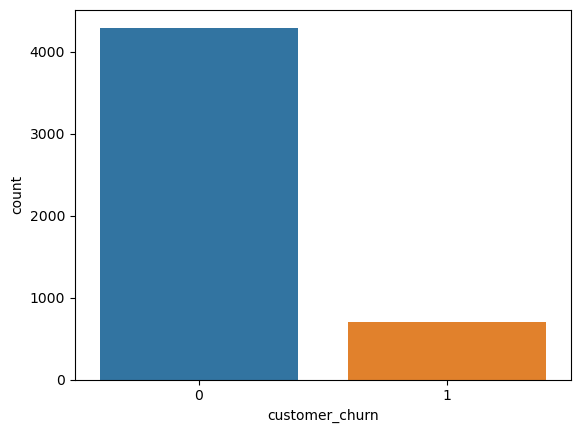

In [32]:
#balance y variable
sns.countplot(x='customer_churn',data=df_dummies)

In [33]:
x.shape,y.shape

((5000, 14), (5000,))

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
ros=RandomOverSampler(random_state=2529)

In [36]:
x_ros,y_ros=ros.fit_resample(x,y)


In [37]:
x_ros.shape,y_ros.shape,x.shape,y.shape

((8586, 14), (8586,), (5000, 14), (5000,))

In [38]:
y.value_counts()

0    4293
1     707
Name: customer_churn, dtype: int64

In [39]:
x_ros.columns

Index(['account_length', 'voice_plan', 'intl_plan', 'intl_calls',
       'intl_charge', 'day_calls', 'day_charge', 'eve_calls', 'eve_charge',
       'night_calls', 'night_charge', 'customer_calls', 'area_code_408',
       'area_code_415'],
      dtype='object')

In [40]:
x_ros.describe()

,account_length,voice_plan,intl_plan,intl_calls,intl_charge,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,customer_calls,area_code_408,area_code_415
count,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000,8586.000000
mean,101.090030,0.212439,0.173305,4.337293,2.823238,100.135337,32.289774,100.138947,17.465191,99.841836,9.126201,1.846611,0.250524,0.495341
std,39.965689,0.409058,0.378533,2.509555,0.747662,20.101840,10.590614,19.840327,4.366529,20.121024,2.252996,1.574365,0.433340,0.500007
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,3.000000,2.350000,87.000000,25.000000,87.000000,14.440000,86.000000,7.620000,1.000000,0.000000,0.000000
50%,101.000000,0.000000,0.000000,4.000000,2.840000,100.000000,32.000000,100.000000,17.600000,100.000000,9.150000,1.000000,0.000000,0.000000
75%,127.000000,0.000000,0.000000,6.000000,3.320000,113.000000,40.000000,114.000000,20.460000,114.000000,10.700000,3.000000,1.000000,1.000000
max,243.000000,1.000000,1.000000,20.000000,5.400000,165.000000,59.000000,170.000000,30.910000,175.000000,17.770000,9.000000,1.000000,1.000000


In [41]:
y_ros.value_counts()

0    4293
1    4293
Name: customer_churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

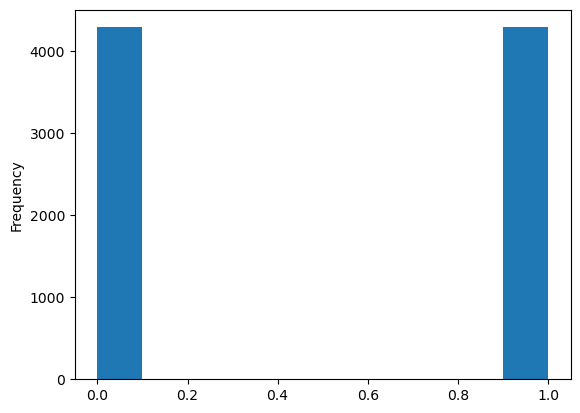

In [42]:
y_ros.plot(kind='hist')

In [43]:
#imp feature using extratreesregressor
import sklearn
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x_ros,y_ros)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)

[0.03450416 0.04531758 0.09041252 0.05811344 0.05052895 0.03552326
 0.2660464  0.03141237 0.09935003 0.03258074 0.05090278 0.17905587
 0.01204289 0.01420899]


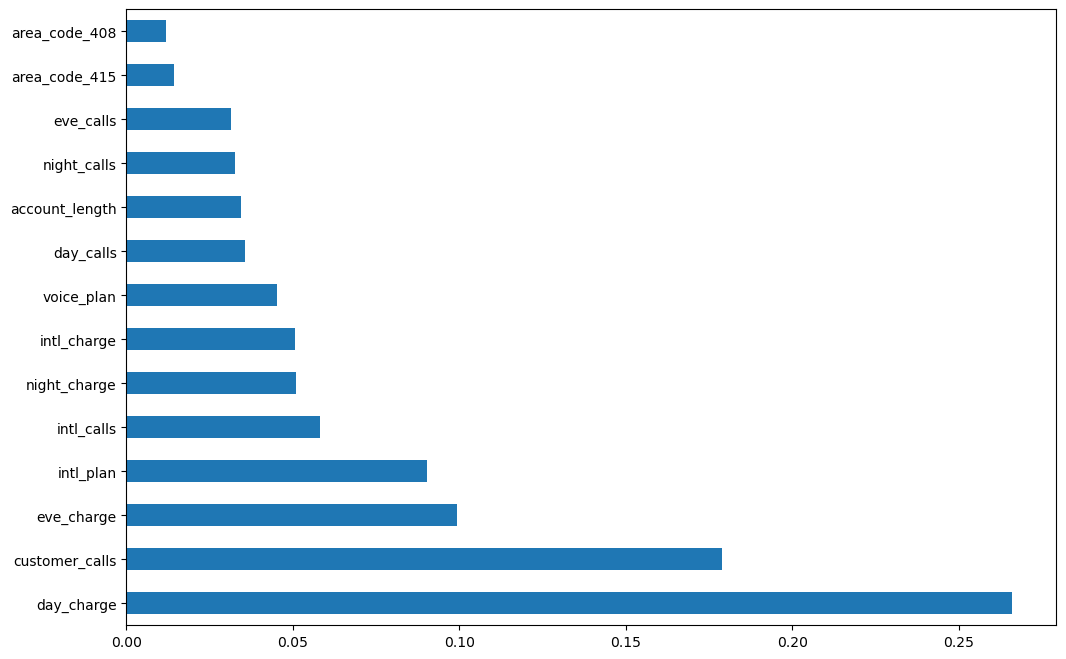

In [45]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Training

In [46]:
from sklearn.model_selection import train_test_split
x_ros_train,x_ros_test,y_ros_train,y_ros_test =train_test_split(x_ros,y_ros, test_size =0.3, random_state=42)

In [47]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_ros_train,y_ros_train)

RandomForestClassifier()

In [48]:
#checking training accuracy
print("training accuracy is:",rf.score(x_ros_train,y_ros_train))

training accuracy is: 1.0


In [49]:
#checking accuracy of test dataset

print("testing accuracy is:",rf.score(x_ros_test,y_ros_test)*100)


testing accuracy is: 99.22360248447205


In [50]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_ros_train,y_ros_train)

DecisionTreeClassifier()

In [51]:
#checking accuracy of test dataset
print("testing accuracy is:",model.score(x_ros_test,y_ros_test)*100)


testing accuracy is: 96.8167701863354


In [52]:
#XGboost  Classifier

import xgboost as xg
from xgboost import XGBClassifier
xg=XGBClassifier(objective='binary:logistic')
xg.fit(x_ros_train,y_ros_train)
y_pred=xg.predict(x_ros_test)


In [53]:
#checking accuracy of test dataset
print("testing accuracy is:",xg.score(x_ros_test,y_ros_test)*100)



testing accuracy is: 99.22360248447205


# Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
param_grid={
    'learning_rate':[1,0.5,0.1,0.01],
    'max_depth':[3,5,10,20],
    'n_estimators':[10,50,100,200]


}

In [56]:
grid=RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),param_grid,verbose=3)

In [57]:
grid.fit(x_ros_train,y_ros_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.971 total time=   1.2s
[CV 2/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.965 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.955 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.961 total time=   1.2s
[CV 5/5] END learning_rate=0.01, max_depth=20, n_estimators=100;, score=0.953 total time=   1.2s
[CV 1/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.926 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.919 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.934 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score=0.929 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=10, n_estimators=10;, score

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_cat_threshold=None,
                                           max_c

In [58]:
grid.best_params_

{'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.5}

In [59]:
xg=XGBClassifier(n_estimators = 200, max_depth = 10, learning_rate = 0.5)
xg.fit(x_ros_train,y_ros_train)
y_pred=xg.predict(x_ros_test)


In [60]:
#checking accuracy of test dataset

print("testing accuracy is:",xg.score(x_ros_test,y_ros_test)*100)


testing accuracy is: 99.30124223602485


# Model Validation

In [61]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_ros_test,y_pred) 
print(cm)

[[1282   17]
 [   1 1276]]


In [62]:
((1282+1276)/(1282+17+1+1276))*100

99.30124223602485

In [63]:
from sklearn.metrics import confusion_matrix,classification_report


In [64]:
print(classification_report(y_ros_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1299
           1       0.99      1.00      0.99      1277

    accuracy                           0.99      2576
   macro avg       0.99      0.99      0.99      2576
weighted avg       0.99      0.99      0.99      2576



# Save Model

In [65]:
import pickle
file='model.sav'
pickle.dump(xg,open(file,'wb'))

In [66]:
load_model = pickle.load(open('model.sav','rb'))

In [67]:
y_pred = load_model.predict(x_ros_test)

In [68]:
y_pred


array([0, 0, 1, ..., 0, 1, 0])

In [69]:
y_pred[100]

1